## Setup

<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1yu5U0X0LNqQ6sQyFcPMlWnVj2D6eWV7m?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [4]:
# Python ≥3.5 is required
import sys

In [5]:
# Scikit-Learn ≥0.20 is required
import sklearn

## Get the Data

The function below merges the OECD's life satisfaction data and the IMF's GDP per capita data. We have discussed this example in class.

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Fetch the files in datasets/lifesat

In [7]:
import os
datapath = os.path.join("datasets", "lifesat", "")

[Uncomment the code] Code below plots pretty figures directly within Jupyter


In [8]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Download the data

In [9]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

# Fill in the missing code


In [10]:
# Importing the essential libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model

In [11]:
# Loading the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

### Definitions
**oecd** - Organisation for Economic Corporation and Development (Data source)
<br>
<br>
**bli** - Better life index
<br>
<br>
**GDP per capita** - Per capita gross domestic product (GDP) is a metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population
<br>
<br>
**Life satisfaction** - The degree to which a person positively evaluates the overall quality of his/her life as a whole
<br>
### Goal
Exloring the dataset and predict the satification of a country using Linear Regressiona and KNN

# Actual

In [12]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) # Calling the function to get and save stats in variable

# Top 5 observations in country_stats dataset, we have GDP per capita and Life satisfaction for each country present
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


From the above dataframe, we can see that the function has calculated the GDP per capita of each country and the life satifcation number for the respective countries

In [13]:
# No of rows and columns
country_stats.shape

(29, 2)

In [14]:
# Dropping the index and as we do not require the country feature which will not help in prediction 
country_stats_v2 =country_stats.reset_index(drop=True, inplace=False)

In [15]:
# Seeing the top 5 observations after the country is removed
country_stats_v2.head()

,GDP per capita,Life satisfaction
0,9054.914,6.0
1,9437.372,5.6
2,12239.894,4.9
3,12495.334,5.8
4,15991.736,6.1


In [16]:
# No of rows and columns in the above dataframe
country_stats_v2.shape

(29, 2)

In [17]:
# Spliting the country_stats dataset_v2
X = country_stats_v2["GDP per capita"]# Saving the GDP per capita feature in X as an input feature 
y = country_stats_v2["Life satisfaction"]# Saving the Life satifaction feature in y as an output feature

In [18]:
# Since we have just only column in each variable X and y, sklearn does not know if it is 1 column with multiple rows or 
# multiple rows with one column so by reshaping (-1,1) will make 1 column with multiple rows
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [19]:
# Importing the train_test_split to split the dataset into train data and test data
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'Life Satisfaction')

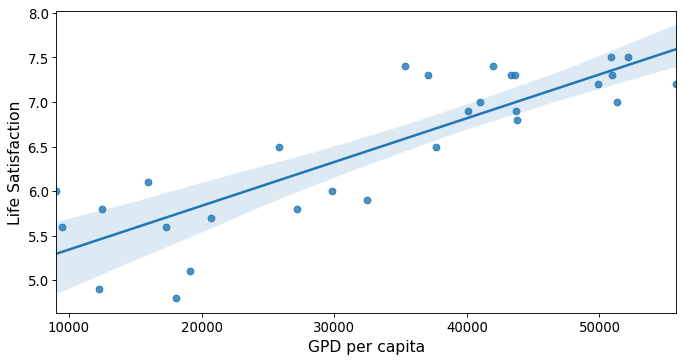

In [20]:
# Visualizing the relationship between the Life satisfaction and GDP per capita
plt.figure(figsize=(10, 5), dpi=80)
# Using the regression plot to visualize the relationship
sns.regplot(X,y)
plt.xlabel('GPD per capita')
plt.ylabel('Life Satisfaction')

**Observation**: From the above regression plot we can see that there is a linear relationship between the GDP per capita and Life satisfaction. This means that as GDP per capita increases the life satifaction also increases. A relationship exists here.

In [21]:
# Since we are having a linear relationship between the features, we are selecting the linear model
from sklearn.linear_model import LinearRegression # Importing the Linear Regression model from sklearn library

#Creating an object
model = LinearRegression() 

In [22]:
# Training the linear regression model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# GDP per capita (USD) of Cyprus in 2015 (Data source: Google)
X_new = [[23333.71]]

In [24]:
# Prediction for Cyprus 
print("For Cyprus, the life satisfaction is predicted to be: ")
print(model.predict(X_new))

For Cyprus, the life satisfaction is predicted to be: 
[[5.99909837]]


In [25]:
# Simple score for Linear Regression model
model.score(X,y) # We have achieved a score of 73% 

0.7344414355437029

### [Update] Replace the Linear Regression model with k-Nearest Neighbors (in this example, k = 3)

In [26]:
# Now replacing linear model with 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

#Creating an object
model1 = KNeighborsRegressor(n_neighbors=3)

In [27]:
# Train the model
model1.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [29]:
# Make a prediction for Cyprus
print("For Cyprus, the life satisfaction is predicted to be:")
print(model1.predict(X_new))

For Cyprus, the life satisfaction is predicted to be:
[[6.]]


In [31]:
model1.score(X,y) # We have achieved a score of 85% 

0.8525732853499179

**Observation**: Comparing the outputs of Linear Regression model and KNN model, we are able to see that they are giving us almost same predictions. And their respective scores are in the range of 70s

## DONE